# PREDICCIÓN DE LA CALIDAD DEL VINO TINTO 🍷

# INTRODUCCIÓN

Objetivo del Proyecto 📝

1. Diseñar e implementar un modelo predictivo utilizando algoritmos de machine learning que permita evaluar y predecir con precisión la calidad de los vinos tintos, basándose en sus propiedades químicas y atributos relevantes.

2. Analizar y comparar el desempeño de diferentes técnicas de machine learning para identificar el enfoque más eficiente y efectivo en la predicción de la calidad del vino, proporcionando insights valiosos que puedan ser aplicados en la industria vinícola para mejorar procesos de producción y toma de decisiones.

3. Link del Dataset: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009


Contexto Comercial 📈

1. Mejora en la calidad del producto: La predicción precisa de la calidad del vino tinto permitirá optimizar la consistencia y calidad del producto, fortaleciendo la reputación de la bodega y aumentando la satisfacción del cliente.

2. Optimización de costos: El uso de modelos predictivos facilitará una asignación óptima de recursos y reducirá el desperdicio, generando ahorros significativos y mejorando la eficiencia operativa.

3. Ventaja competitiva en el mercado: La producción constante de vinos tintos de alta calidad brindará a las bodegas una ventaja competitiva, ayudándolas a destacar en el mercado y atraer a más clientes.

# IMPORTACIÓN DE LIBRERIAS 📚

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

from imblearn.over_sampling import SMOTE

pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

# CARGA DEL DATASET ⏳

In [3]:
file_path = 'https://raw.githubusercontent.com/RussoT99/ProyectoDS_ParteI/main/winequality-red.csv'

df = pd.read_csv(file_path)
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# DESCRIPCIÓN DE LAS VARIABLES

**Datos**

*  **fixed acidity:** La cantidad de ácidos no volátiles en el vino. Se mide en gramos por litro (g/L).

*  **volatile acidity:** Se refiere a la cantidad de ácidos volátiles en el vino. Un nivel alto puede indicar problemas en la fermentación. Se mide en gramos por litro (g/L).

*  **citric acid:**  Representa la cantidad de ácido cítrico. Se mide en gramos por litro (g/L).

*  **residual sugar:** Es la cantidad de azúcar que queda en el vino después de la fermentación. Se mide en gramos por litro (g/L).

*  **chlorides:** La cantidad de cloruro en el vino. Se mide en gramos por litro (g/L).

*  **free sulfur dioxide:** El dióxido de azufre libre, que actúa como conservante. Se mide en miligramos por litro (mg/L).

*  **total sulfur dioxide:** La suma de todo el dióxido de azufre presente en el vino, tanto en forma libre como combinada. Se mide en miligramos por litro (mg/L).

*  **density:** La densidad del vino, que puede estar influenciada por el contenido de alcohol y azúcar. Se expresa en g/cm³.

*  **pH:** Mide la acidez o alcalinidad del vino en una escala de 0 a 14. Siendo 0 muy acido y 14 muy básico o alcalino.

*  **sulphates:**  La cantidad de sulfatos en el vino. Se mide en gramos por litro (g/L).

*  **alcohol:** El porcentaje de alcohol en el vino. Es la graduación alcoholica de la bebida.

*  **quality:**  La calificación de calidad del vino, usualmente en una escala de 0 a 10, basada en evaluaciones sensoriales.


# COMPRENSIÓN BÁSICA DE LOS DATOS 🧠

In [4]:
df.shape

(1599, 12)

📊 Inferencia:
* Hay un total de 1599 registros/filas en el conjunto de datos.
* Hay un total de 12 características/columnas en el conjunto de datos.

In [5]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Columns: 12 entries, fixed acidity to quality
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


📊 Inferencia:
* Todas las características presentes en el conjunto de datos son numéricas.
* No hay características categóricas presentes en el conjunto de datos.

In [6]:
null_df = df.isnull().sum().to_frame().rename(columns={0:"Nº total de valores perdidos"})
null_df["% de valores perdidos"] = round(100*null_df["Nº total de valores perdidos"]/len(df),2)
null_df.sort_values(by="% de valores perdidos",ascending=False)

,Nº total de valores perdidos,% de valores perdidos
fixed acidity,0,0.0
volatile acidity,0,0.0
citric acid,0,0.0
residual sugar,0,0.0
chlorides,0,0.0
free sulfur dioxide,0,0.0
total sulfur dioxide,0,0.0
density,0,0.0
pH,0,0.0
sulphates,0,0.0


📊 Inferencia:
* Ninguna de las características tiene valores perdidos.
* Podemos decir que el conjunto de datos será más fiable para la predicción de la calidad del vino.

In [7]:
print("¿Hay registros duplicados? => ",df.duplicated().any())
print("-"*42)
print("El total de registros duplicados presentes es =>",df[df.duplicated()==True].shape[0])

¿Hay registros duplicados? =>  True
------------------------------------------
El total de registros duplicados presentes es => 240


📊 Inferencia:
* La primera salida es True lo que indica que hay registros duplicados.
* El segundo resultado es 240, lo que indica que hay un total de 240 registros duplicados.
* Los registros duplicados pueden provocar problemas de integridad de datos, por lo que es mejor ver la posibilidad de tratarlos.

In [8]:
df.drop_duplicates(inplace=True)

Aunque en este caso en particular, es posible que se repitan valores en algun que otro parámetro fisicoquimico, se considera la opción de eliminarlos para evitar problemas a futuro y poder tener una mejor predicción en el modelado con ML.

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


📊 Inferencia:
* La calidad mínima del vino es 3 y la máxima 8.
* La media de alcohol que contiene un vino tinto según los datos es de 10,4.
* Hay una gran diferencia entre el dióxido de azufre total medio y el dióxido de azufre total máximo.

# EDA 📊  

# 1 - Visualización de la variable objetivo

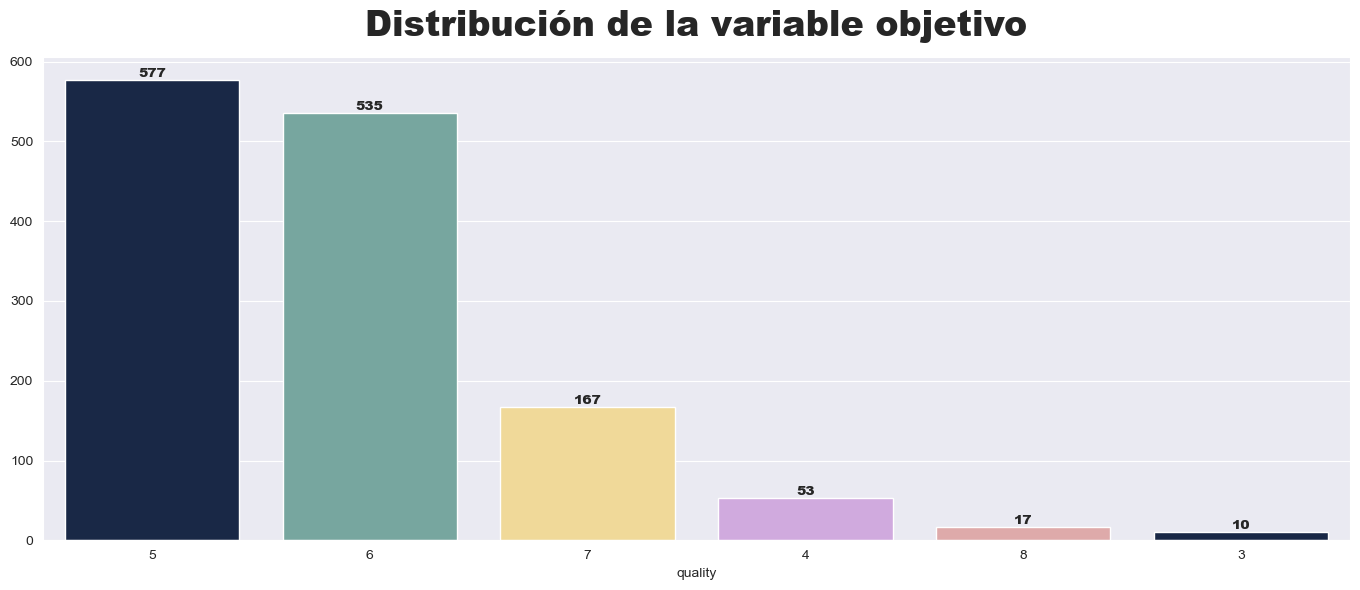

In [10]:
plt.figure(figsize=(13.7,6))
z = df["quality"].value_counts()
sns.barplot(x=z.index, y=z.values, order=z.index, palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Distribución de la variable objetivo",fontweight="black",size=25,pad=15)
for index,value in enumerate(z.values):
    plt.text(index,value,value, ha="center", va="bottom",fontweight="black")

plt.tight_layout()
plt.show()

📊 Inferencia:
* La mayoría de los vinos tienen una calidad de 5 o 6.
* Podemos observar claramente un desequilibrio de clases en la característica objetivo.
* Para superar el desequilibrio de clases podemos utilizar técnicas como
SMOTE (técnica de sobremuestreo de minorías sintéticas).

# 2- Visualización del atributo "Fixed acidity"

In [11]:
def numerical_plot(column):
    plt.figure(figsize=(13.5,10))
    plt.subplot(2,1,1)
    sns.boxplot(x="quality",y=column, data=df, palette=["#FFA07A","#D4A1E7","#FFC0CB","#87CEFA","#F08080","#D8BFD8"])
    plt.title(f"{column.title()} vs Calidad",fontweight="black",size=25,pad=10,)

    plt.subplot(2,1,2)
    sns.histplot(x=column,kde=True,hue="quality",data=df, palette="Set2")
    skew = df[column].skew()
    plt.title(f" La asimetria de la variable {column.title()} es: {round(skew,3)}",fontweight="black",size=20,pad=10)
    plt.tight_layout()
    plt.show()

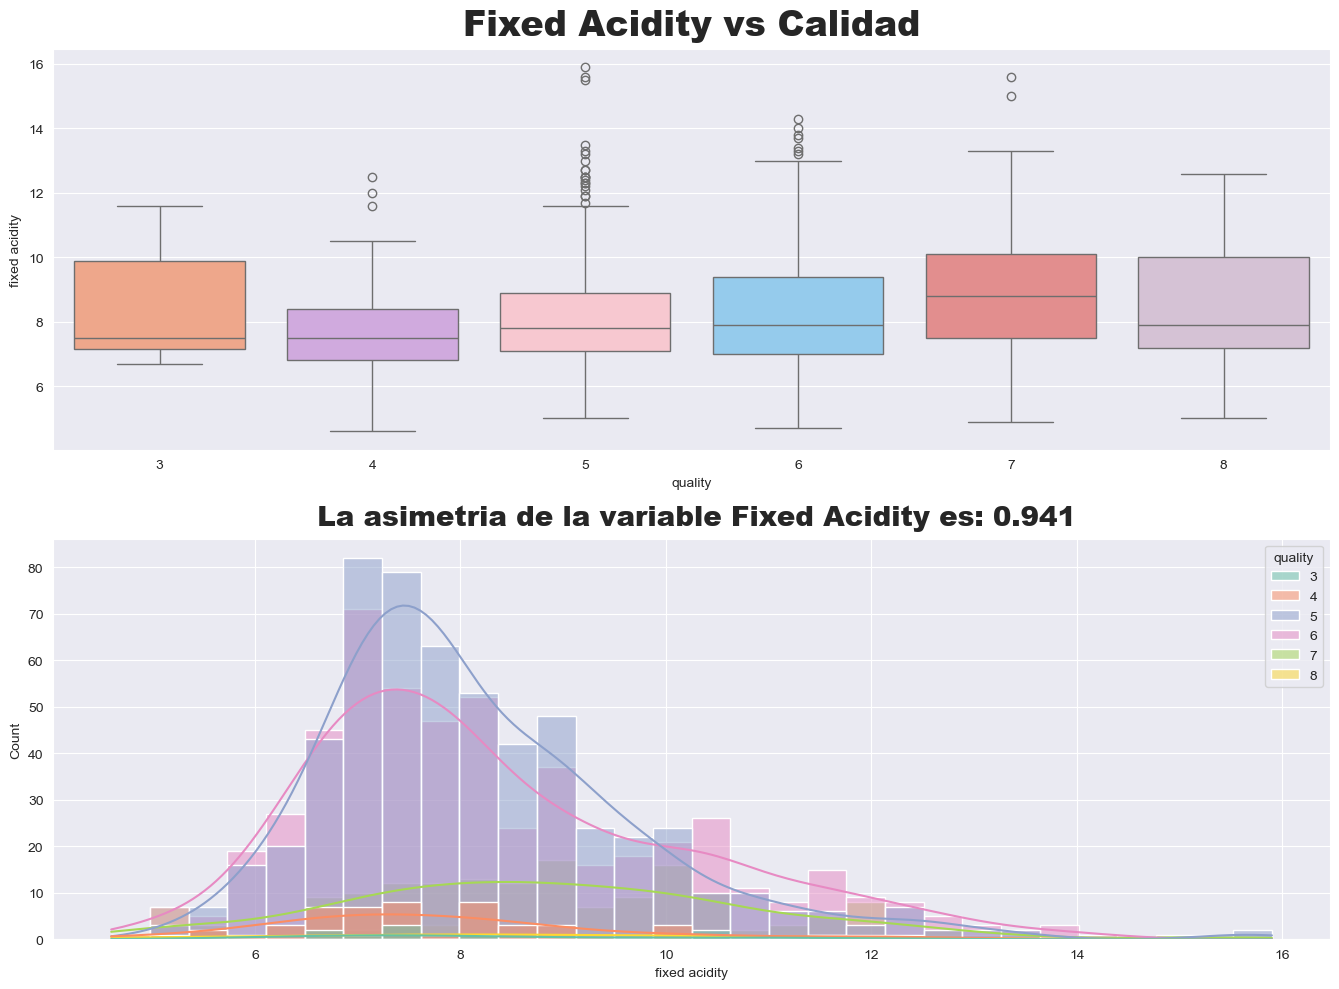

In [12]:
numerical_plot("fixed acidity")

# 3- Visualización del atributo "Volatile acidity"

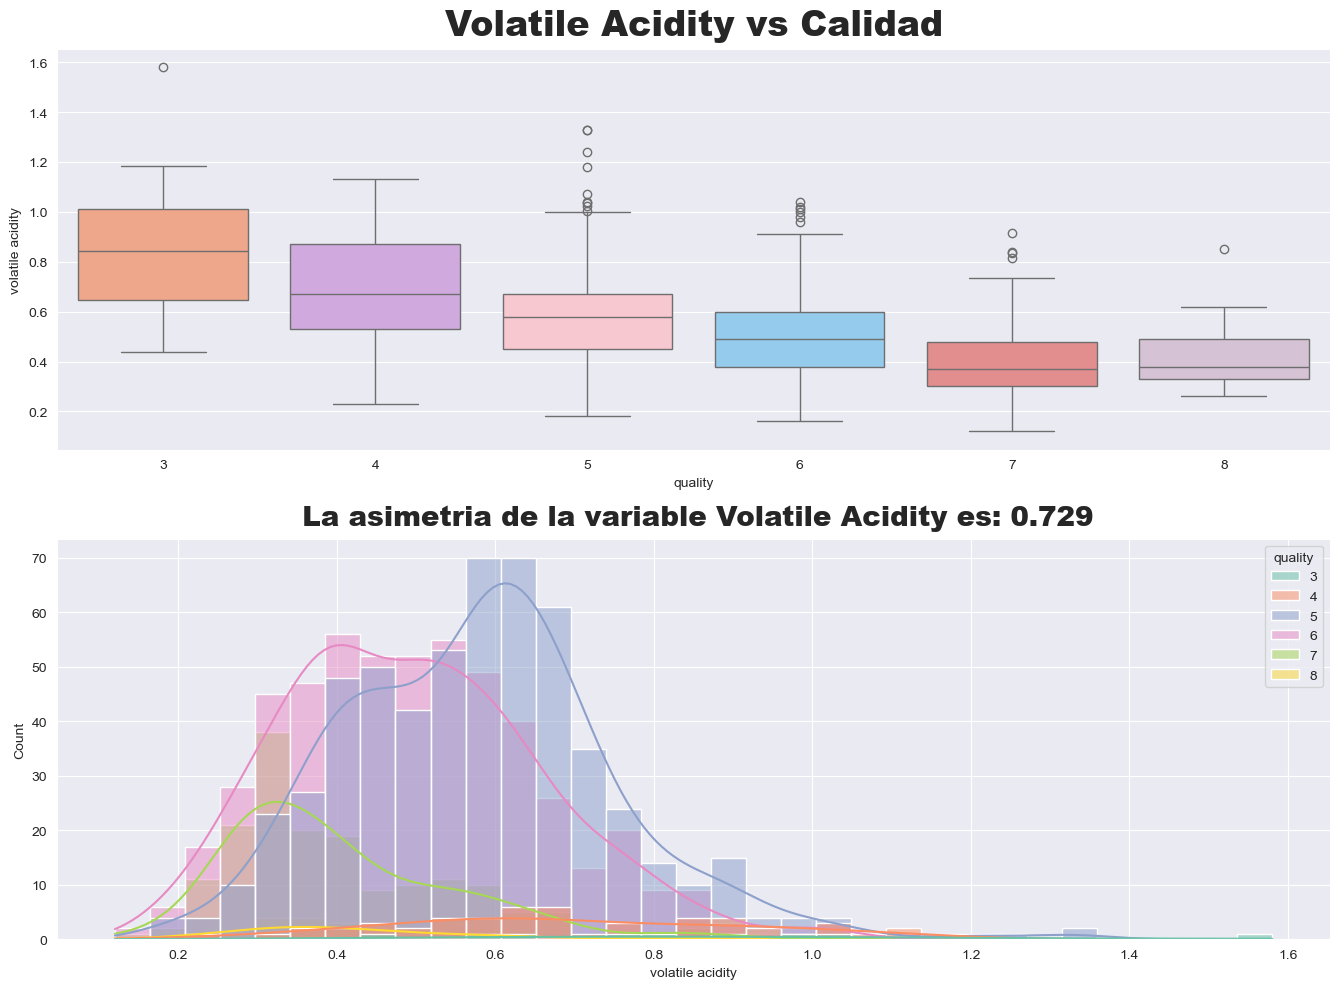

In [13]:
numerical_plot("volatile acidity")

# 4- Visualización del atributo "Citric acid"

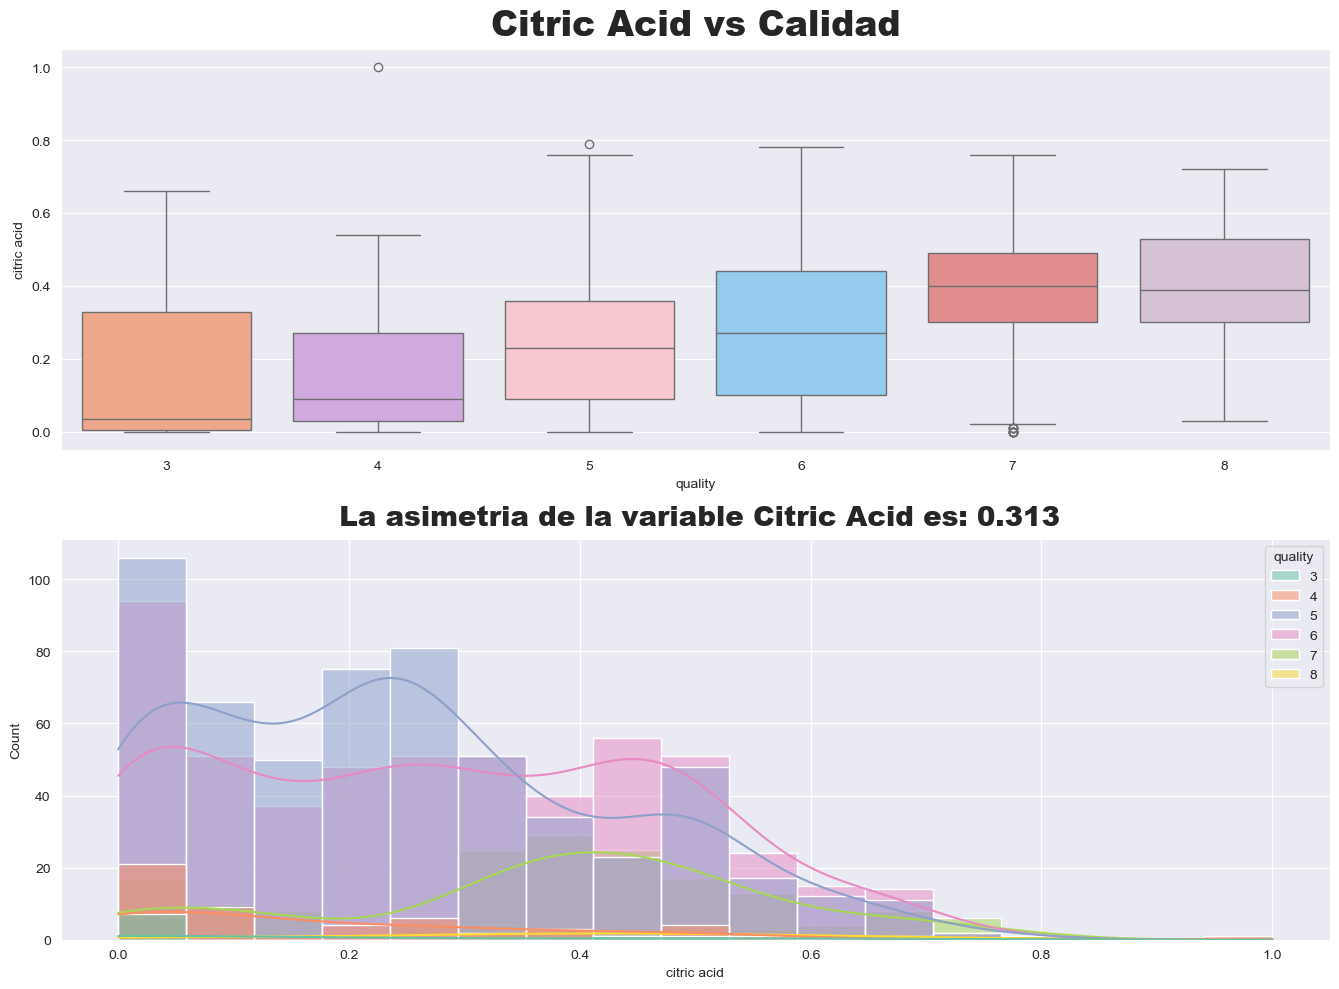

In [14]:
numerical_plot("citric acid")

# 5- Visualización del atributo "Residual sugar"

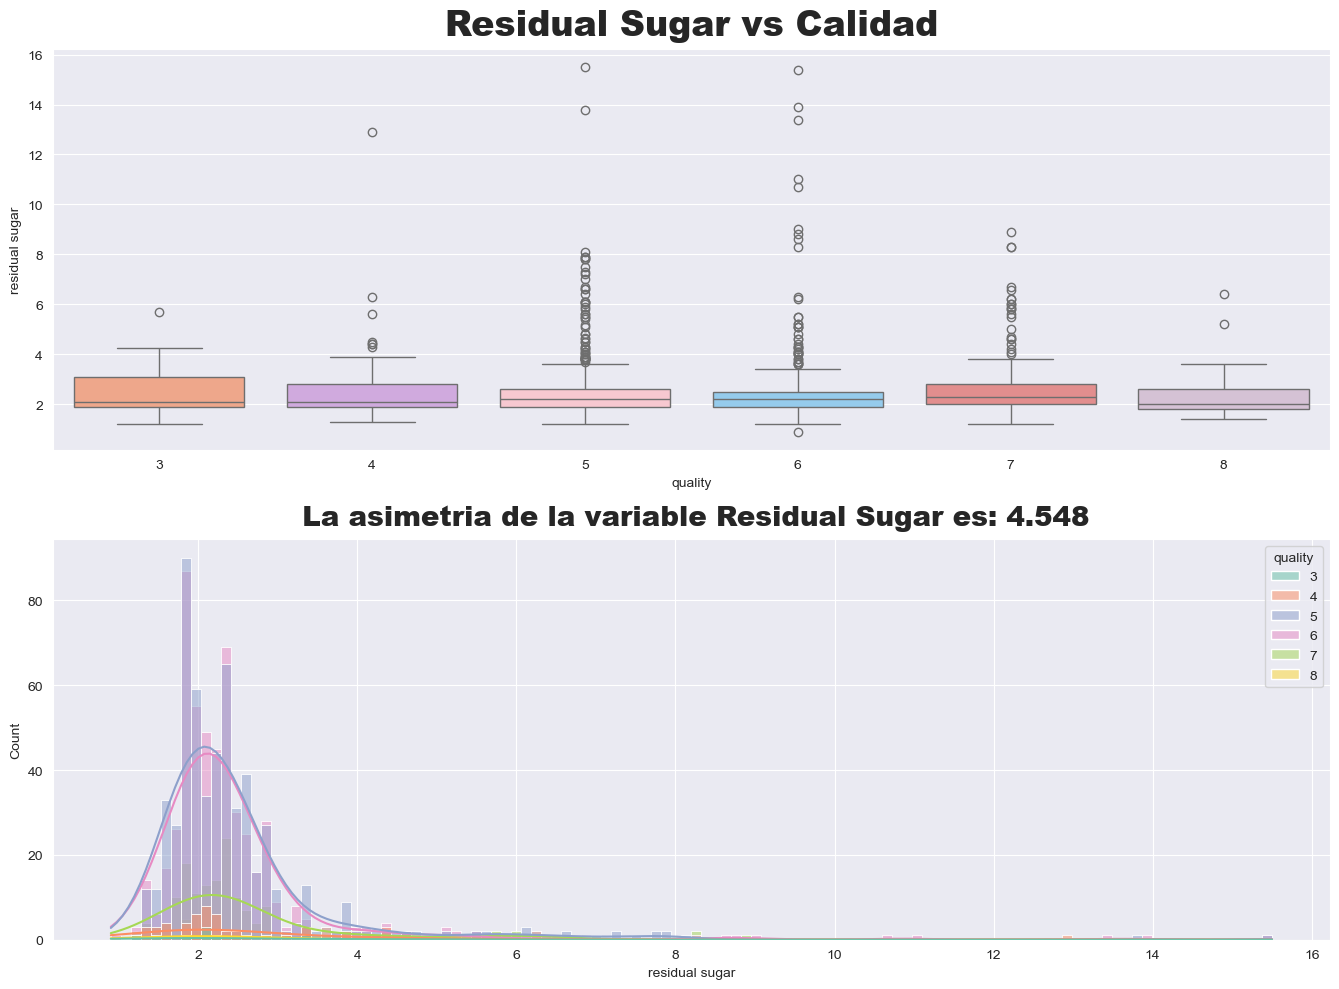

In [15]:
numerical_plot("residual sugar")

# 6- Visualización del atributo "Chlorides"

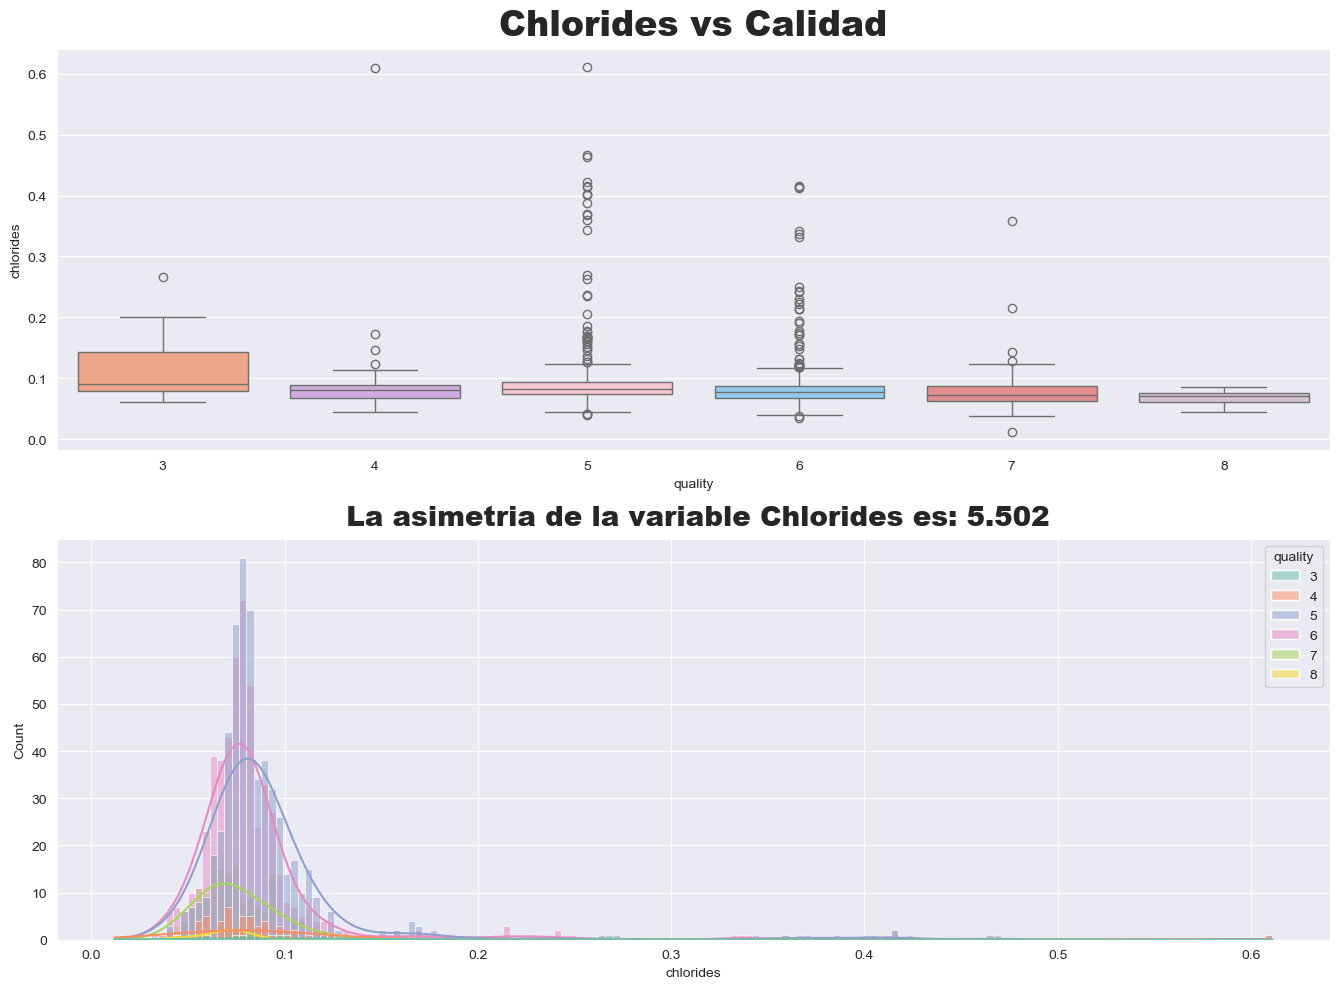

In [16]:
numerical_plot("chlorides")

# 7- Visualización del atributo "Free sulfur dioxide"

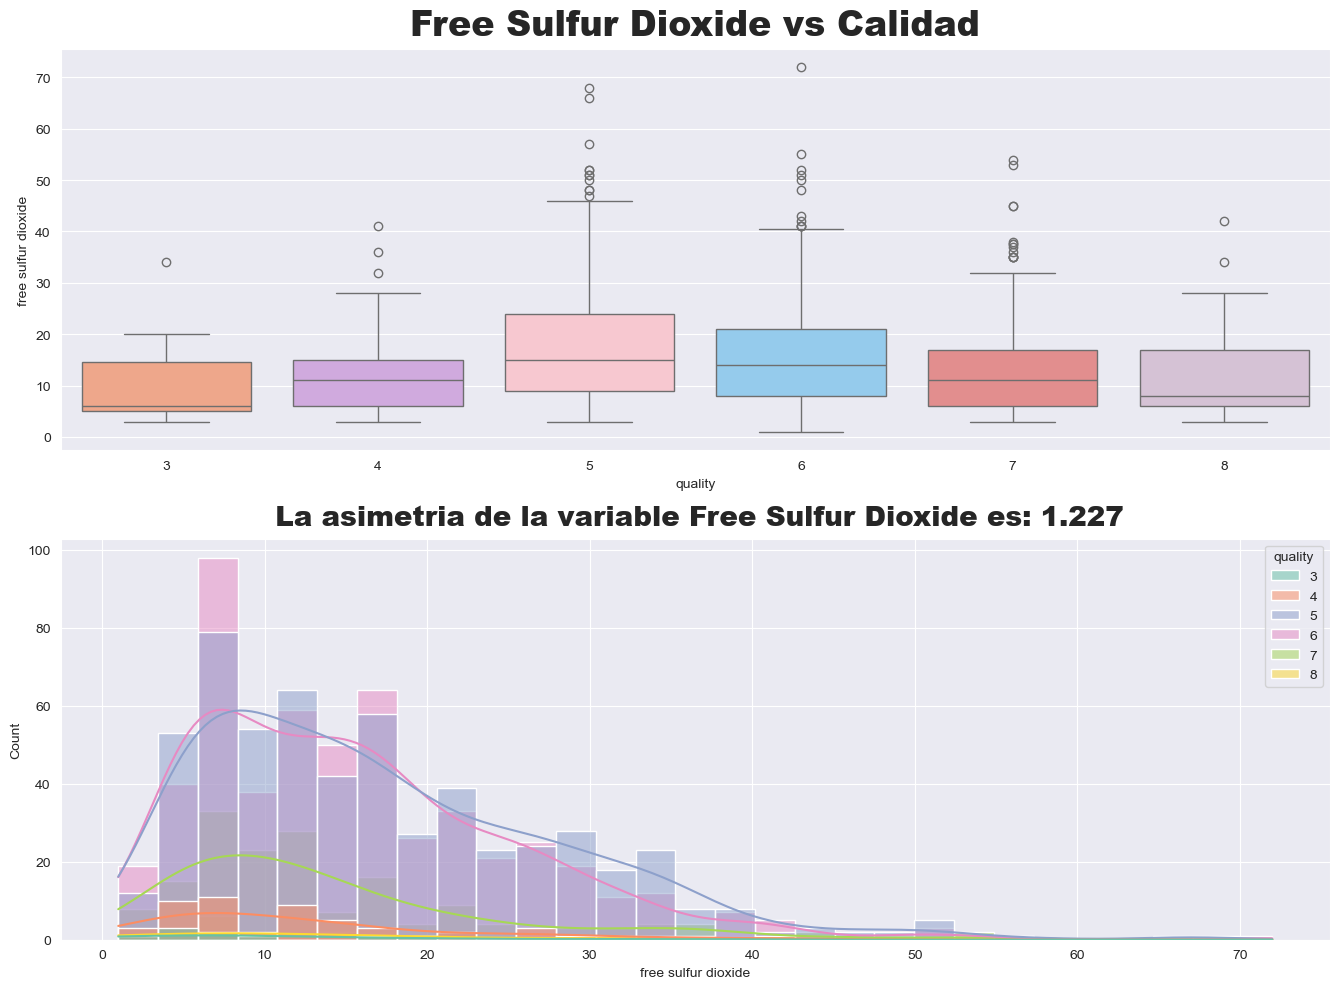

In [17]:
numerical_plot("free sulfur dioxide")

# 8- Visualización del atributo "Total Sulfur Dioxide"

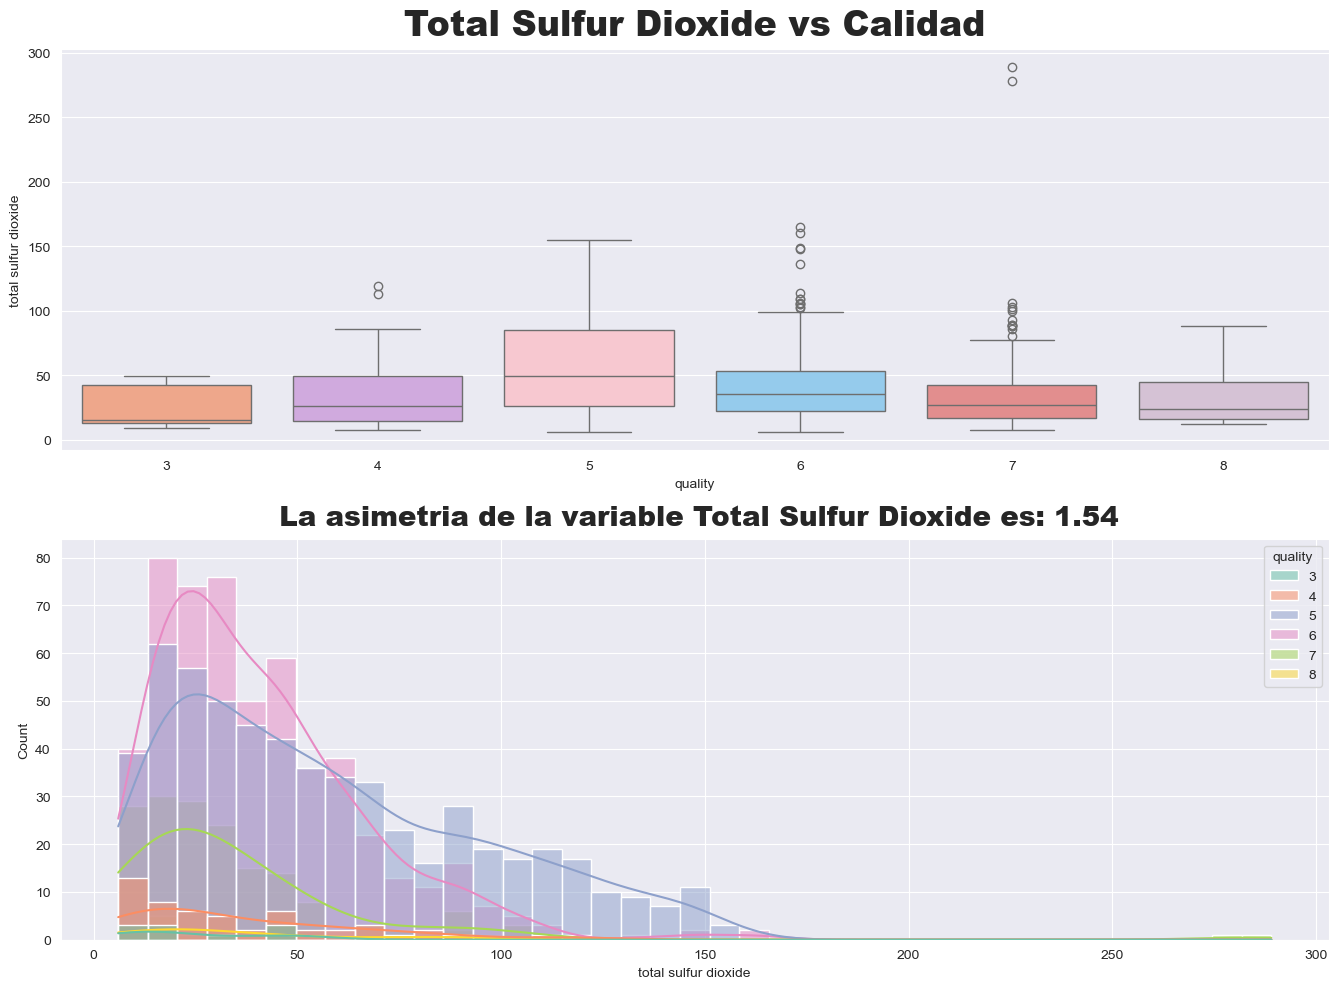

In [18]:
numerical_plot("total sulfur dioxide")

# 9- Visualización del atributo "Density"

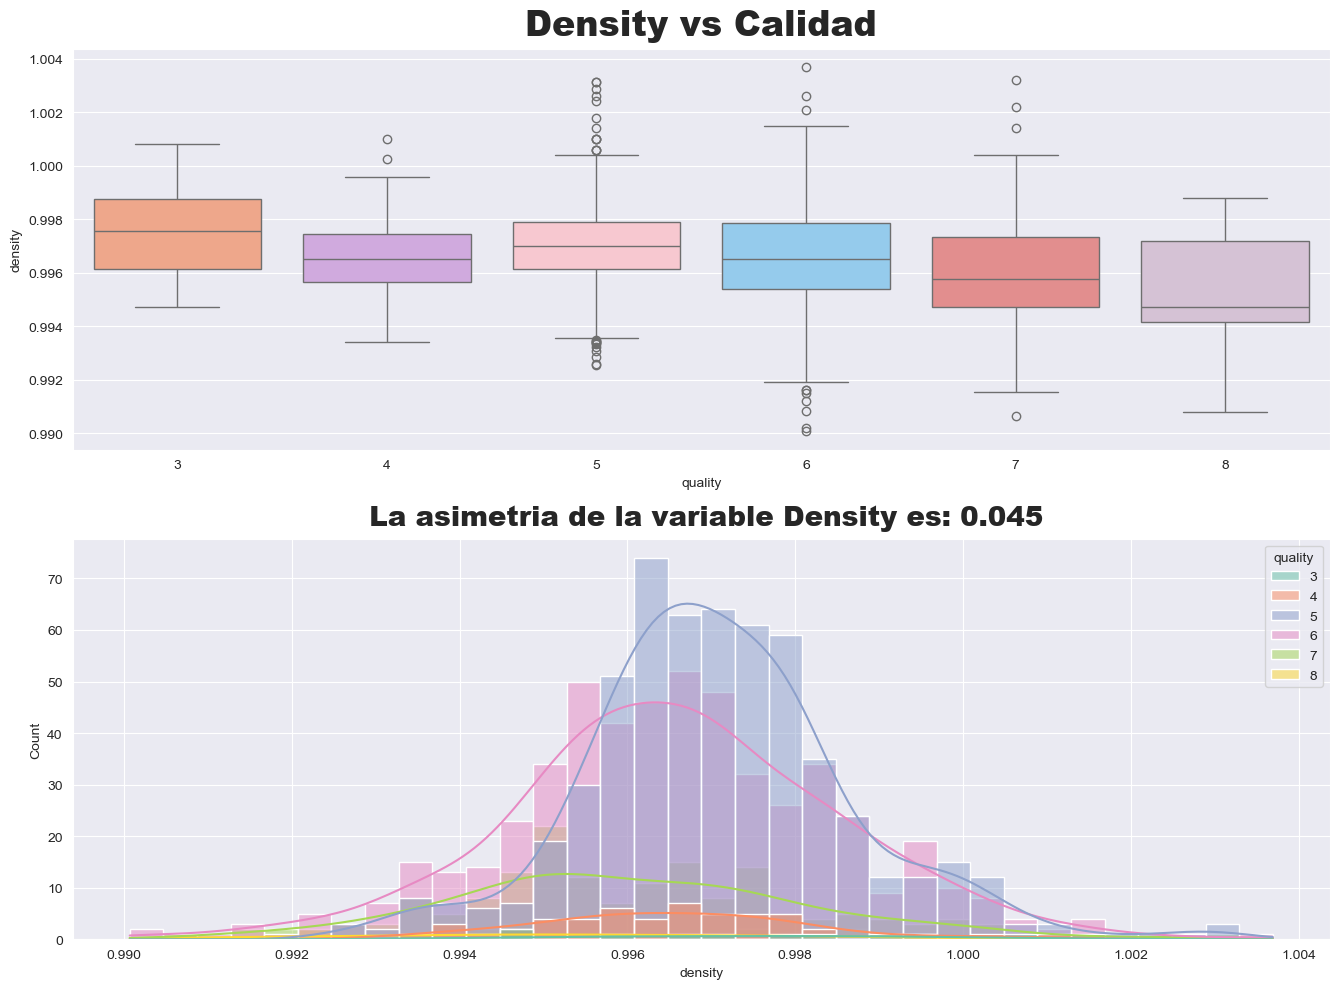

In [19]:
numerical_plot("density")

# 10- Visualización del atributo "pH"

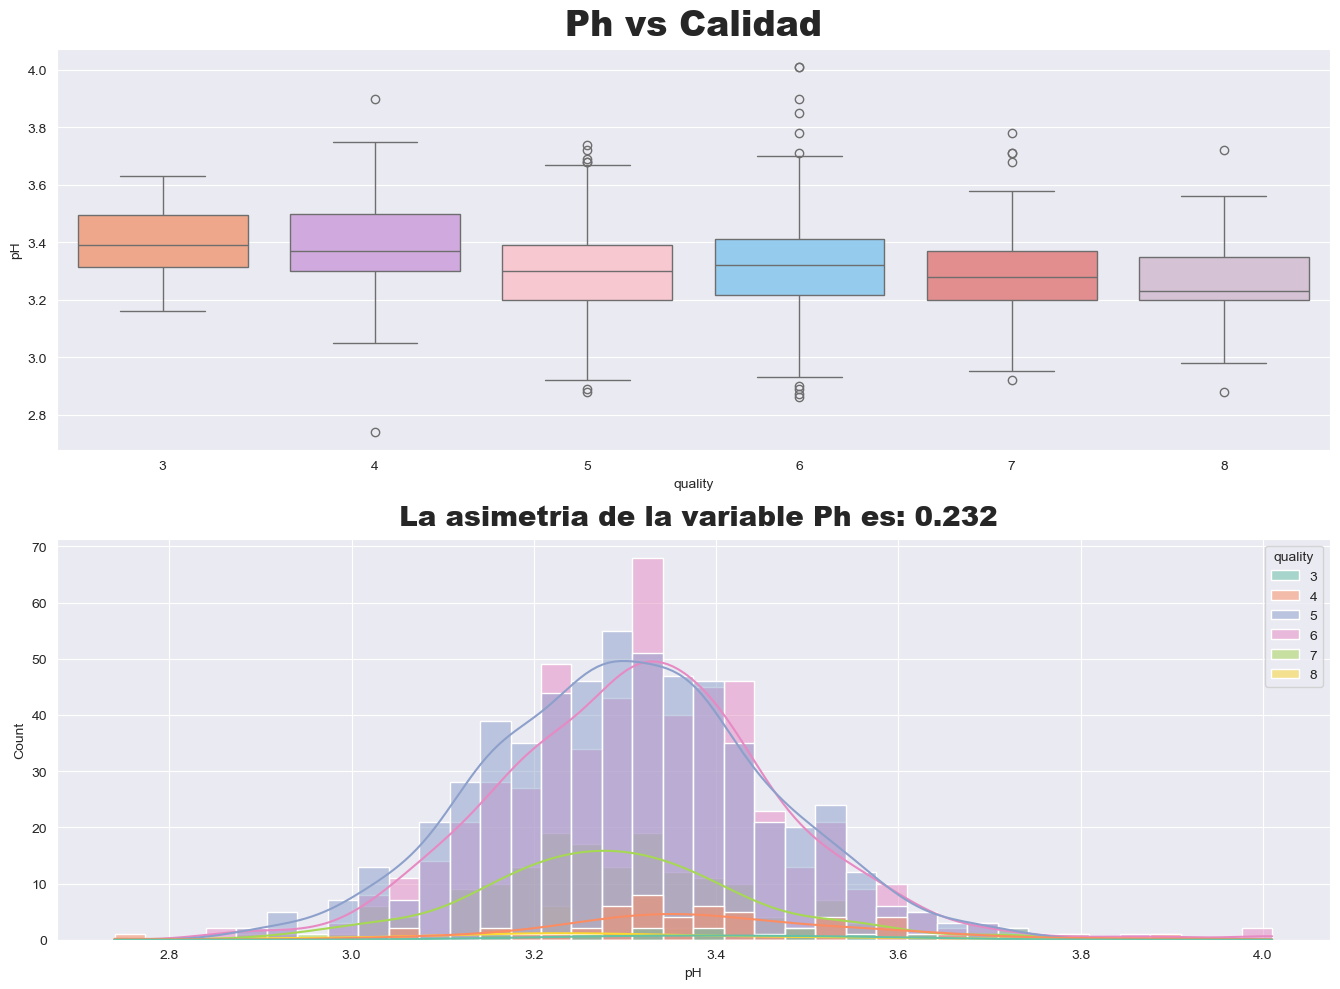

In [20]:
numerical_plot("pH")

# 11- Visualización del atributo "Sulphates"

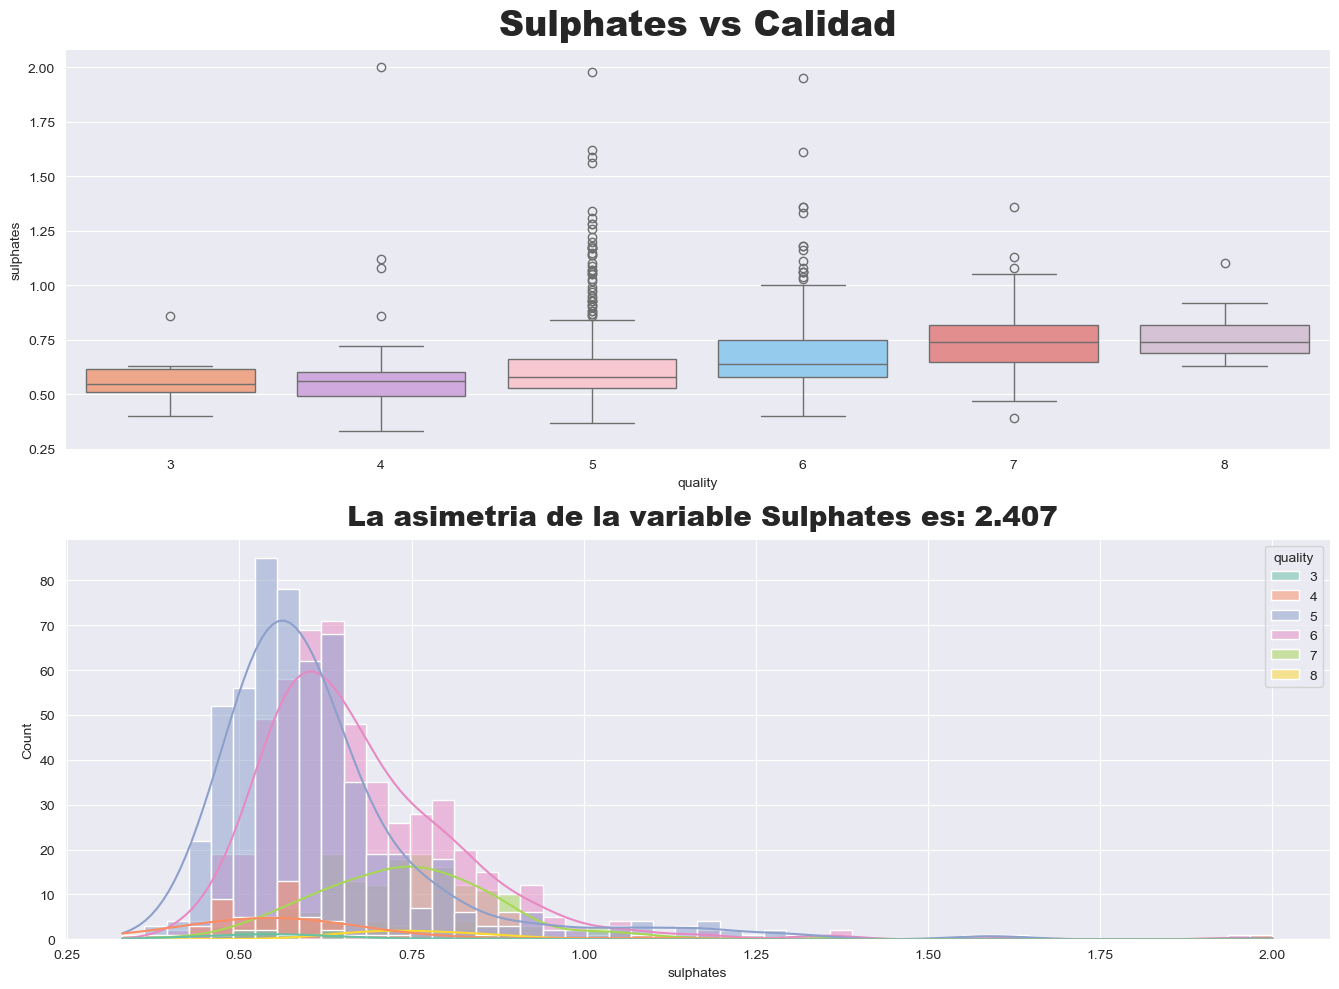

In [21]:
numerical_plot("sulphates")

# 12- Visualización del atributo "Alcohol"

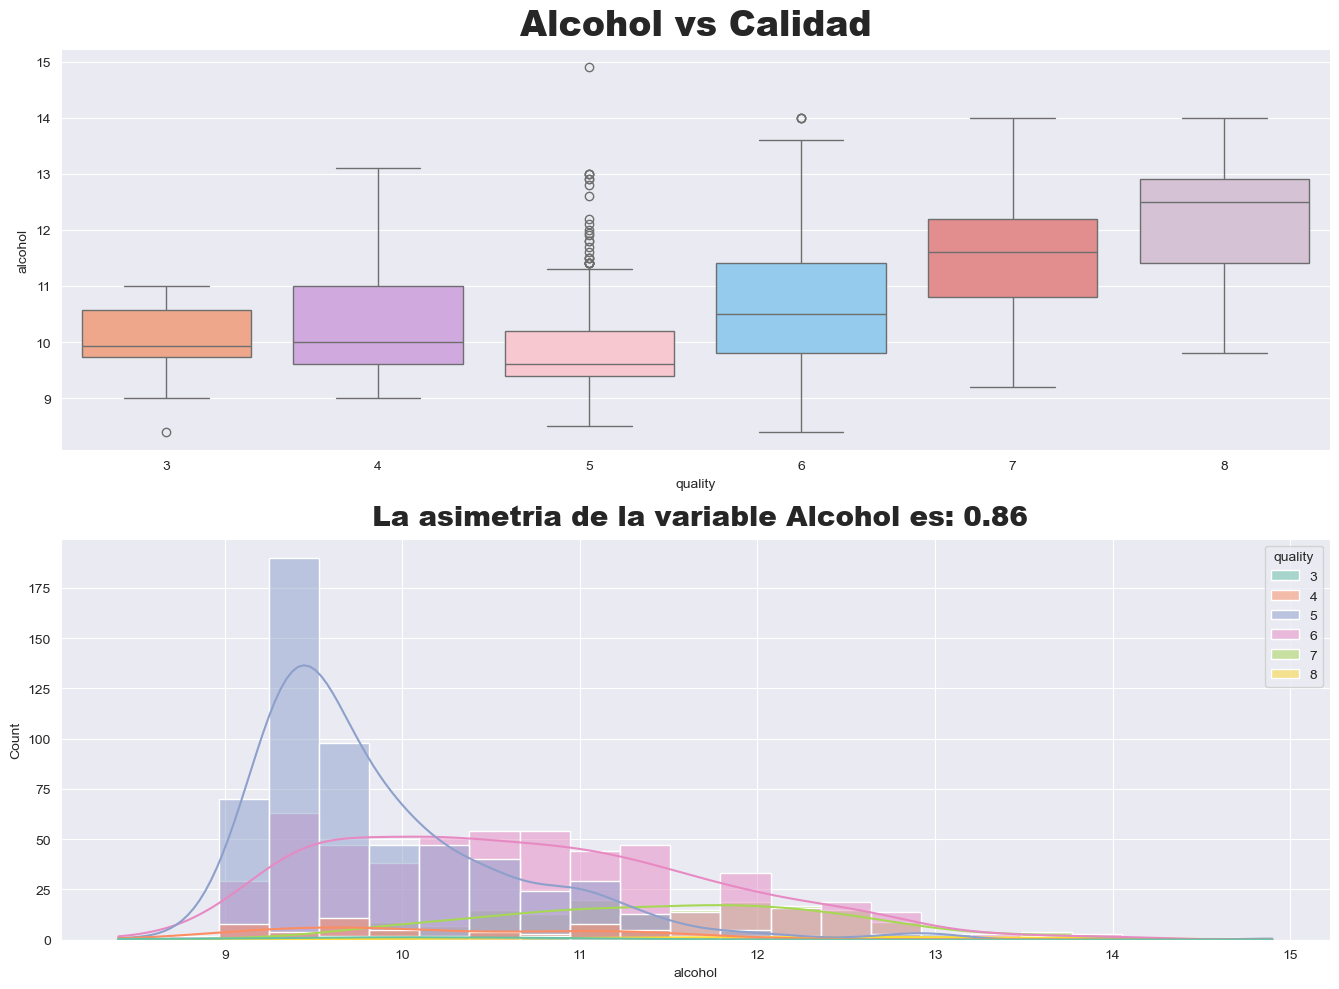

In [22]:
numerical_plot("alcohol")

📊 Inferencia:

* Las características "fixed acidity", "volatile acidity" y "citric acid" tienen casi una distribución simétrica, pero la distribución es un poco sesgada a la derecha.

* Las características "residual sugar", "chlorides", "free sulfur dioxide" y "total sulfur dioxide" tienen una distribución casi simétrica, pero la distribución está muy sesgada a la derecha debido a la presencia de valores atípicos.

* La característica "density" tiene una distribución de normal perfecta porque la asimetría es cercana a 0.

* La característica "pH" tiene una distribución normal, pero aún así las colas son poco sesgadas a la derecha debido a la presencia de valores atípicos.

* La característica "Sulphates" tiene una distribución casi simétrica, pero la distribución está muy sesgada debido a la presencia de valores atípicos.

* La característica Alcohol tiene una distribución asimétrica y la distribución está muy sesgada a la derecha debido a la presencia de valores atípicos.

* La asimetría puede tener varias implicaciones, como el rendimiento del modelo, la comprobación de hipótesis y una estimación sesgada.


# 13- Visualización de la correlación entre los atributos independientes

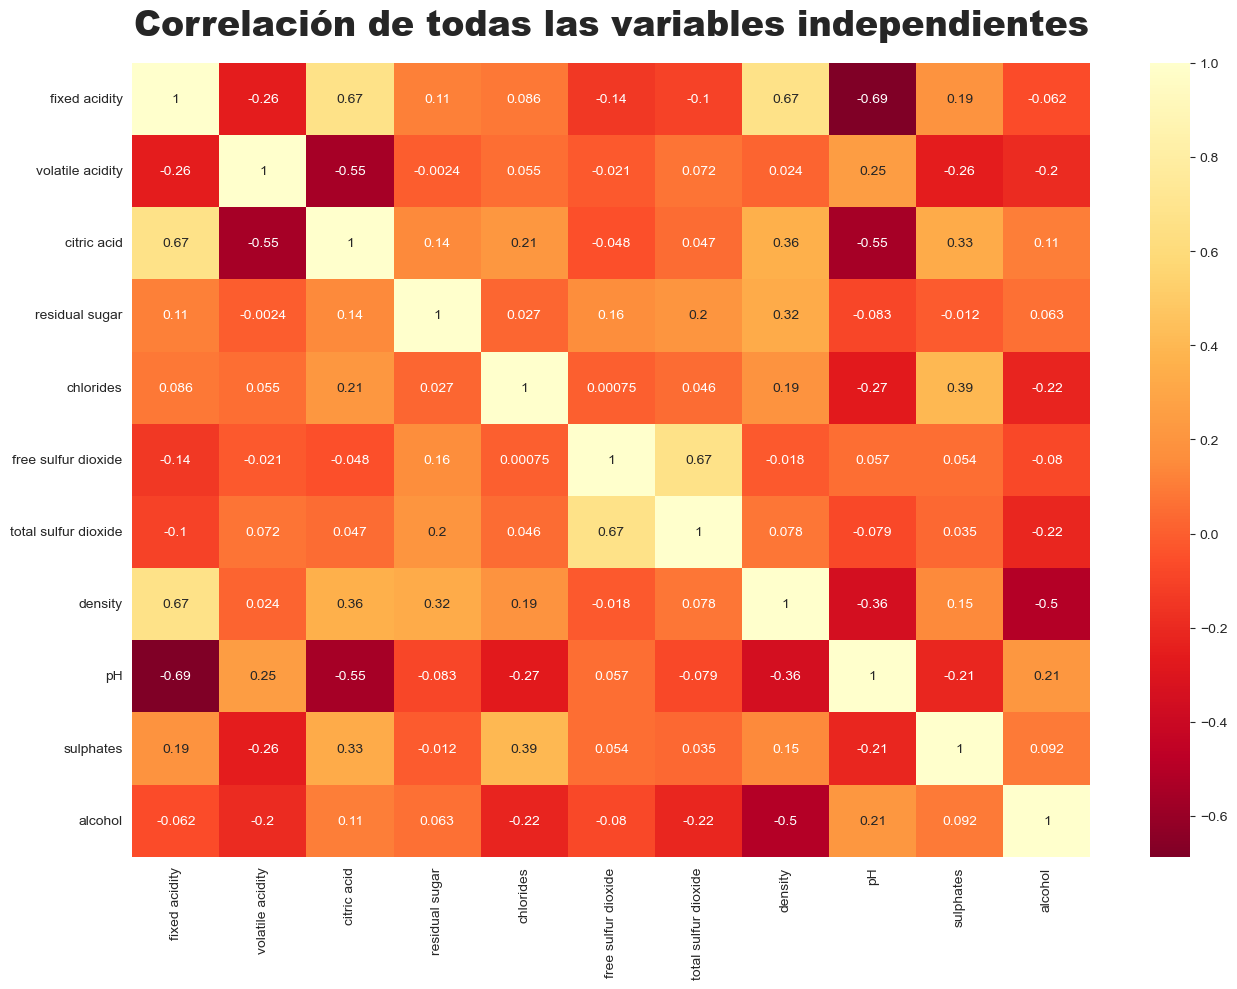

In [23]:
columns = df.columns.tolist()
columns.remove("quality")  #La calidad tiene valores discretos por eso no es la forma correcta de comprobar su importancia

corr = df[columns].corr()

plt.figure(figsize=(13.5,10))

sns.heatmap(corr,fmt=".2g",annot=True ,cmap='YlOrRd_r')
plt.title("Correlación de todas las variables independientes",fontweight="black",size=25,pad=20)
plt.tight_layout()
plt.show()

📊 Inferencia:
* Muchas características están teniendo alta correlación con las otras características
* La acidez fija tiene una alta correlación con el ácido cítico y el pH y viceversa.
* La acidez volátil tiene una alta correlación con el ácido cítrico y viceversa.
* El dióxido de azufre libre tiene una alta correlación con el dióxido de azufre total, el pH, los sulfatos y viceversa.
* La densidad tiene una alta correlación con la acidez fija, el alcohol y viceversa.


# ⚙️ PREPROCESAMIENTO DE DATOS 

# 1- Cálculo de la asimetría de cada atributo numérico

In [24]:
new_df  = df.copy()
columns = df.columns.tolist()
columns.remove("quality")

In [25]:
skew_df = df[columns].skew().to_frame().rename(columns={0:"Asimetría"})
skew_df

,Asimetría
fixed acidity,0.941041
volatile acidity,0.729279
citric acid,0.312726
residual sugar,4.548153
chlorides,5.502487
free sulfur dioxide,1.226579
total sulfur dioxide,1.540368
density,0.044778
pH,0.232032
sulphates,2.406505


📊 Inferencias:

* Excepto la densidad, el pH y el ácido cítrico, todas las demás características tienen una asimetría elevada.

* Utilizaremos técnicas de transformación para que estas características tengan una distribución simétrica.

# 2- División de la variable objetivo en dos grupos

In [26]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [27]:
#Condición de división: Si la varible quality > 6.5 => «bueno» ELSE => «malo»

bin_edges = [0,6.5,10]
group_names = ["Malo","Bueno"]

df["quality"] = pd.cut(df["quality"], bins=bin_edges, labels=group_names)
df["quality"].unique()

['Malo', 'Bueno']
Categories (2, object): ['Malo' < 'Bueno']

# 3- Visualización de la nueva distribución de la variable objetivo.

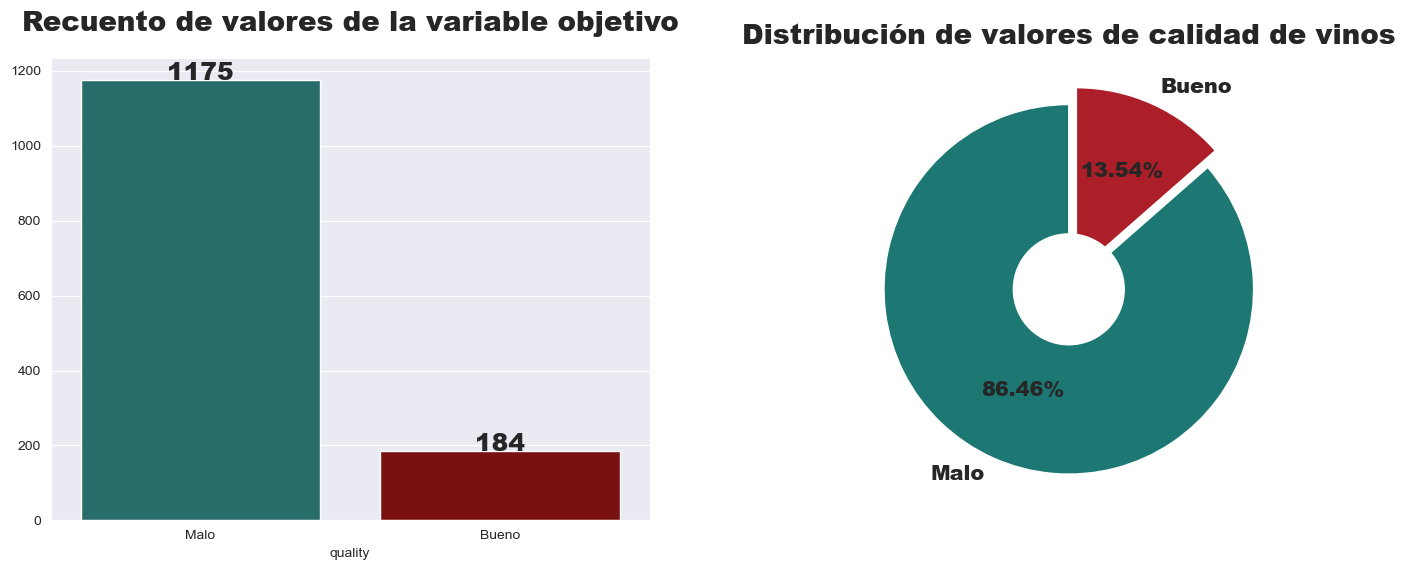

In [28]:
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
quality_counts = df["quality"].value_counts()
sns.barplot(x=quality_counts.index, y=quality_counts.values,palette=["#1d7874","#8B0000"])
plt.title("Recuento de valores de la variable objetivo",fontweight="black",size=20,pad=20)
for i, v in enumerate(quality_counts.values):
    plt.text(i, v, v,ha="center", fontweight='black', fontsize=18)

plt.subplot(1,2,2)
plt.pie(quality_counts, labels=["Malo","Bueno"], autopct="%.2f%%", textprops={"fontweight":"black","size":15},
        colors = ["#1d7874","#AC1F29"],explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Distribución de valores de calidad de vinos" ,fontweight="black",size=20,pad=10)
plt.show()

📊 Inferencias:
* Todavía podemos observar el desequilibrio de clases.
* El conjunto de datos contiene más vinos de mala calidad y menos vinos de buena calidad.

# 4- Encoding de la variable objetivo

In [29]:
df["quality"] = df["quality"].replace({"Malo":0,"Bueno":1})

In [30]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
863,7.2,0.620,0.06,2.5,0.078,17.0,84.0,0.99746,3.51,0.53,9.7,0
35,7.8,0.645,0.00,5.5,0.086,5.0,18.0,0.99860,3.40,0.55,9.6,0
876,7.1,0.470,0.00,2.2,0.067,7.0,14.0,0.99517,3.40,0.58,10.9,0
626,8.8,0.600,0.29,2.2,0.098,5.0,15.0,0.99880,3.36,0.49,9.1,0
1509,7.9,0.180,0.40,1.8,0.062,7.0,20.0,0.99410,3.28,0.70,11.1,0


# 5- División del conjunto de datos

In [36]:
df2 = df.drop(columns="quality")
n_splits = 5  
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

In [37]:
for train_index, test_index in stratified_kfold.split(df2, df["quality"]):
    x_train, x_test = df2.iloc[train_index], df2.iloc[test_index]
    y_train, y_test = df["quality"].iloc[train_index], df["quality"].iloc[test_index]

In [38]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1088, 11) (1088,)
(271, 11) (271,)


📊 Inferencias:
* Los datos se dividen en dos conjuntos, uno para el entrenamiento del modelo y otro para la prueba del rendimiento del modelo.
* Utilizaremos el conjunto de datos de entrenamiento para entrenar el modelo y el conjunto de datos de prueba para evaluar el rendimiento del modelo.

# 6- Cálculo de la frecuencia de valores únicos en Y_Train e Y_Test.

In [43]:
unique_df = y_train.value_counts().to_frame().rename(columns={"quality":"Y_train Target frecuencia"})
unique_df["Y_test target Frecuencia"] = y_test.value_counts()
unique_df

,count,Y_test target Frecuencia
quality,,
0,940,235
1,148,36


📊 Inferencias:
* Ambas categorías en la variable objetivo se dividen de tal manera que el modelo aprende y crea patrones para ambas categorías fácilmente.

# 🎯 CREACIÓN DE MODELO USANDO ARBOL DE DECISIÓN 

# 1- Realizar una búsqueda en cuadrícula con validación cruzada para encontrar los mejores parámetros para el modelo.

In [70]:
dtree = DecisionTreeClassifier()

In [71]:
param_grid = {"max_depth":[3,4,5,6,7,8,9,10],
              "min_samples_split":[2,3,4,5,6,7,8],
              "min_samples_leaf":[1,2,3,4,5,6,7,8],
              "criterion":["gini","entropy"],
              "splitter":["best","random"],
              "max_features":["sqrt",None],
              "random_state":[0,42]}

In [72]:
grid_search = GridSearchCV(dtree, param_grid, cv=5, n_jobs=-1)

grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'random_state': [0, 42],
                         'splitter': ['best', 'random']})

# 2- Obtención de los mejores parámetros para el modelo DecisionTree.

In [73]:
best_parameters = grid_search.best_params_

print("Los mejores parámetros para el modelo de DecisioTree son:\n")
best_parameters

Los mejores parámetros para el modelo de DecisioTree son:



{'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'random_state': 0,
 'splitter': 'random'}

# 3- Creación del modelo DecisionTree utilizando los mejores parámetros.

In [74]:
dtree = DecisionTreeClassifier(**best_parameters)

dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=3, random_state=0,
                       splitter='random')

# 4- Cálculo de la precisión del modelo.

In [75]:
y_train_pred = dtree.predict(x_train)
y_test_pred = dtree.predict(x_test)

print("Accuracy Score del modelo de Training Data es =>",round(accuracy_score(y_train,y_train_pred)*100,2),"%")
print("Accuracy Score del modelo de Testing Data es =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

Accuracy Score del modelo de Training Data es => 91.54 %
Accuracy Score del modelo de Testing Data es => 85.61 %


📊 Inferencias:
* El modelo ha obtenido un 92% de precisión en el conjunto de datos de entrenamiento y un 86% de precisión en el conjunto de datos de prueba.
* Por lo tanto, no hay ajuste insuficiente ni ajuste excesivo en el modelo.
* El modelo tiene un tipo de mejor ajuste.

# 5- Evaluación del modelo utilizando diferentes valores métricos.

In [76]:
print("F1 Score del modelo es =>",f1_score(y_test,y_test_pred, average="weighted"))
print("Recall Score del modelo es =>",recall_score(y_test,y_test_pred, average="weighted"))
print("Precision Score del modelo es =>",precision_score(y_test,y_test_pred, average="weighted"))

F1 Score del modelo es => 0.8447584963222251
Recall Score del modelo es => 0.8560885608856088
Precision Score del modelo es => 0.8374829748297482


📊 Inferencia:
* Podemos observar que el recall, la precisión y la puntuación F1 son aproximadamente iguales, lo que significa que nuestro modelo está logrando un equilibrio perfecto entre la identificación correcta de muestras positivas (recall) y la minimización de falsos positivos (precisión).
* Los elevados valores de la puntuación F1, la puntuación de recall y la puntuación de precisión, todos ellos superiores a 0,8, sugieren que el modelo logra un buen rendimiento.
* Estas métricas sugieren que el modelo logra una buena precisión en la predicción de la clase positiva.

# 6- Búsqueda de la importancia de las características en el clasificador DecisionTree.

In [77]:
imp_df = pd.DataFrame({"Nombre de la variable":x_train.columns,
                       "Importancia":dtree.feature_importances_})

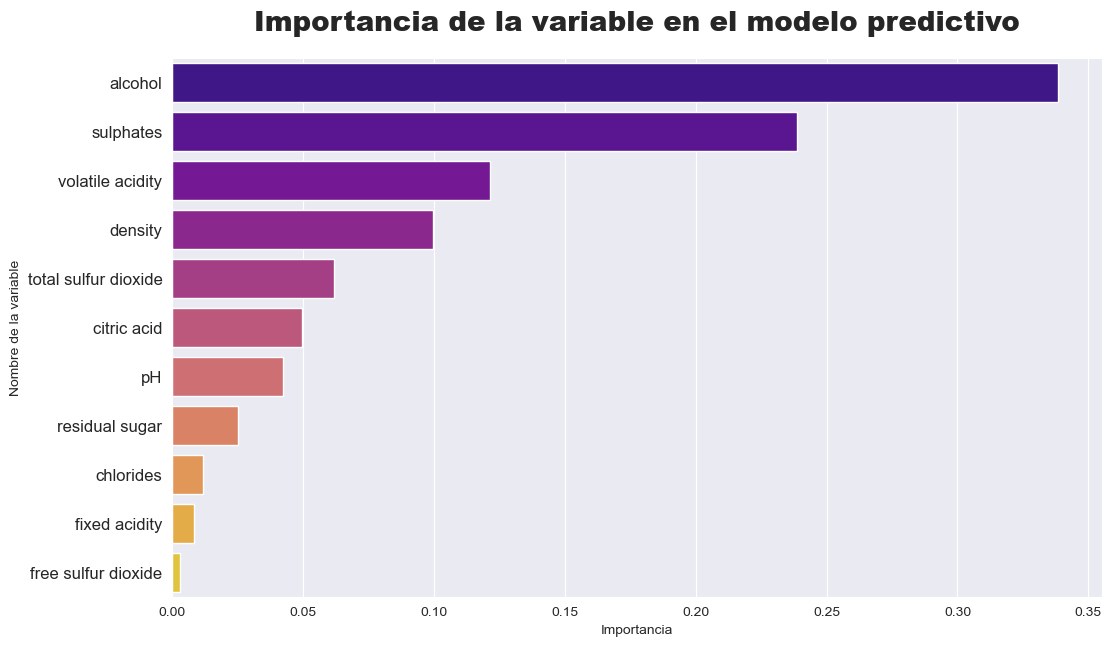

In [78]:
features = imp_df.sort_values(by="Importancia",ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x="Importancia", y="Nombre de la variable", data=features, palette="plasma")
plt.title("Importancia de la variable en el modelo predictivo", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()

📊 Inferencia:
* Los factores clave que influyen significativamente en la calidad del vino son:-
Alcohol, Sulfatos y Acidez Volátil.
* El impacto mínimo de las características en la calidad del vino son:
dióxido de azufre libre, pH y azúcar residual


# 7- Evaluación del modelo mediante la matriz de confusión.

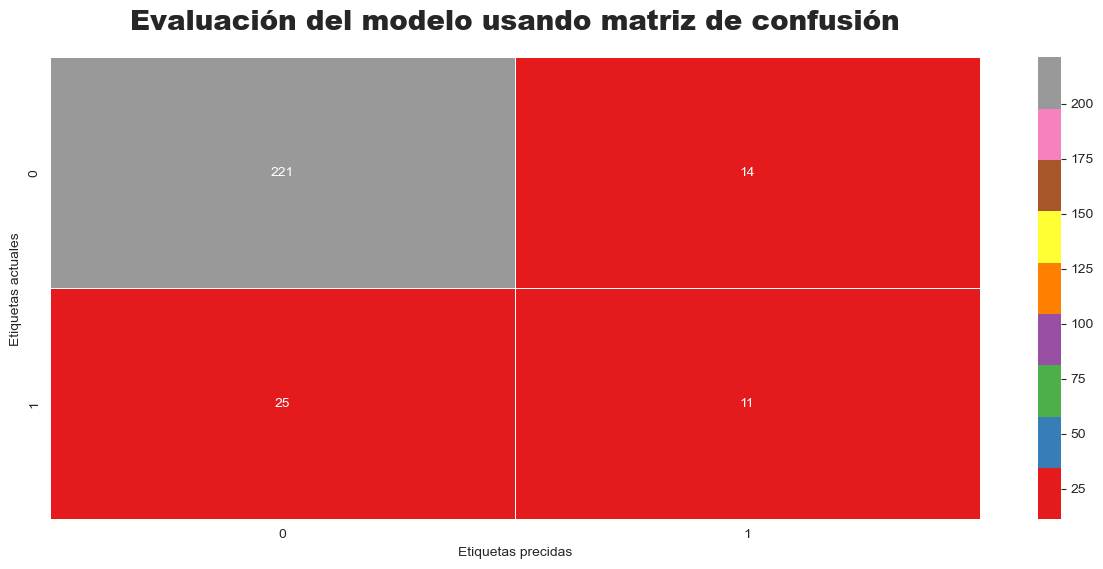

In [79]:
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Evaluación del modelo usando matriz de confusión",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Etiquetas actuales")
plt.xlabel("Etiquetas precidas")
plt.show()

📊 Inferencia:
* **Fuerte tasa de verdaderos positivos:** El modelo logró un alto número de predicciones verdaderas positivas, lo que indica su capacidad para identificar correctamente los casos positivos. Esto sugiere que el modelo es eficaz para clasificar con precisión el resultado deseado.
* **Necesidad de mejora en la tasa de falsos negativos:** La presencia de un número relativamente alto de falsos negativos sugiere que el modelo puede haber pasado por alto la identificación de algunos casos positivos reales. Esto indica la necesidad de un mayor refinamiento para mejorar la capacidad del modelo para capturar todos los casos positivos.

# 8- Evaluación del modelo: Curva ROC y área bajo la curva (AUC)

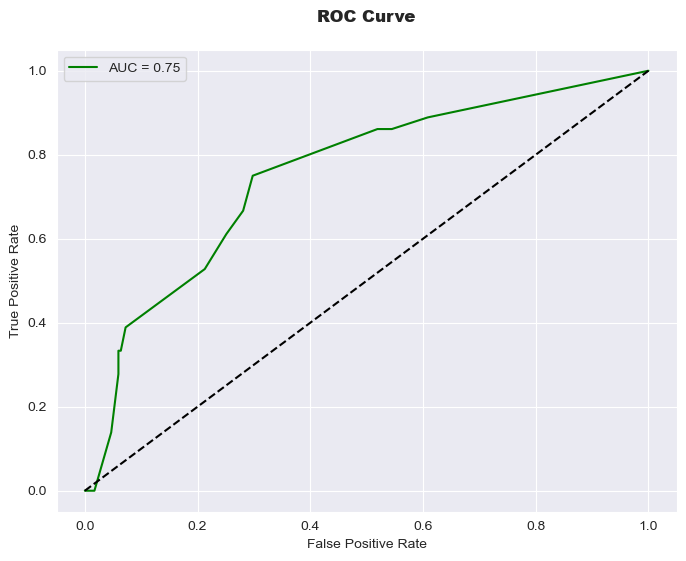

In [80]:
y_pred_proba = dtree.predict_proba(x_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_proba)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve",pad=20,fontweight="black")
plt.legend()
plt.show()

📊 Inferencia:
* Un valor de AUC (Área Bajo la Curva) de 0,75 sugiere que el modelo tiene un fuerte poder discriminativo.
* Esto sugiere que el modelo tiene una alta capacidad para distinguir entre instancias positivas y negativas, lo que indica su eficacia para hacer predicciones precisas.
* El modelo tiene una probabilidad relativamente alta de clasificar mejor un caso positivo seleccionado al azar que un caso negativo seleccionado al azar.

# 🎯 CREACIÓN DE MODELO USANDO RANDOM FOREST

# 1- Realizar una búsqueda en cuadrícula con validación cruzada para encontrar los mejores parámetros los para el modelo.

In [81]:
rfc = RandomForestClassifier()

In [84]:
param_grid = {"max_depth":[3,4,5,6],
              "min_samples_split":[3,4,5,6],
              "min_samples_leaf":[3,4,5,6],
              "n_estimators": [50,80,100],
              "criterion":["gini","entropy"]}



In [85]:
grid_search = GridSearchCV(rfc, param_grid, cv=3, n_jobs=-1)

grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [50, 80, 100]})

# 2- Obtención de los mejores parámetros para el modelo RandomForest

In [86]:
best_parameters = grid_search.best_params_

print("Los mejores parametros para el modelo de Random Forest son:\n\n")
best_parameters

Los mejores parametros para el modelo de Random Forest son:




{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 4,
 'n_estimators': 80}

# 3- Creación del modelo RandomForest utilizando los mejores parámetros.

In [87]:
rfc = RandomForestClassifier(**best_parameters)

rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5,
                       min_samples_split=4, n_estimators=80)

# 4- Cálculo de la precisión del modelo.

In [89]:
y_train_pred = rfc.predict(x_train)
y_test_pred  = rfc.predict(x_test)

print("Accuracy Score del modelo en Training Data es de =>",round(accuracy_score(y_train,y_train_pred)*100,2),"%")
print("Accuracy Score de modelo en Testing Data es de =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

Accuracy Score del modelo en Training Data es de => 90.07 %
Accuracy Score de modelo en Testing Data es de => 88.56 %


💬 Inferencia:
* El modelo ha obtenido 90% de precisión en el conjunto de datos de entrenamiento y 88% de precisión en el conjunto de datos de prueba.
* Así que no hay subajuste o sobreajuste en el modelo.
* El modelo tiene un tipo de mejor ajuste.

# 5- Evaluación del modelo utilizando diferentes valores métricos.

In [90]:
print("F1 Score del modelo es =>",f1_score(y_test,y_test_pred,average="weighted"))
print("Recall Score del modelo es =>",recall_score(y_test,y_test_pred,average="weighted"))
print("Precision Score del modelo es =>",precision_score(y_test,y_test_pred,average="weighted"))

F1 Score del modelo es => 0.8503590894137025
Recall Score del modelo es => 0.8856088560885609
Precision Score del modelo es => 0.8824819092346767


💬 Inferencia:
* Podemos observar que el recall, la precisión y la puntuación F1 son aproximadamente iguales, lo que significa que nuestro modelo está logrando un equilibrio perfecto entre la correcta identificación de muestras positivas (recall) y la minimización de falsos positivos (precisión).
* Los elevados valores de la puntuación F1, la puntuación de recall y la puntuación de precisión, todos ellos superiores a 0,8, sugieren que el modelo logra un buen rendimiento.
* Estas métricas sugieren que el modelo logra una buena precisión en la predicción de la clase positiva.

# 6- Encontrar la importancia de las características en el modelo RandomForest.

In [94]:
imp_df = pd.DataFrame({"Feature Name":x_train.columns,
                       "Importancia":rfc.feature_importances_})

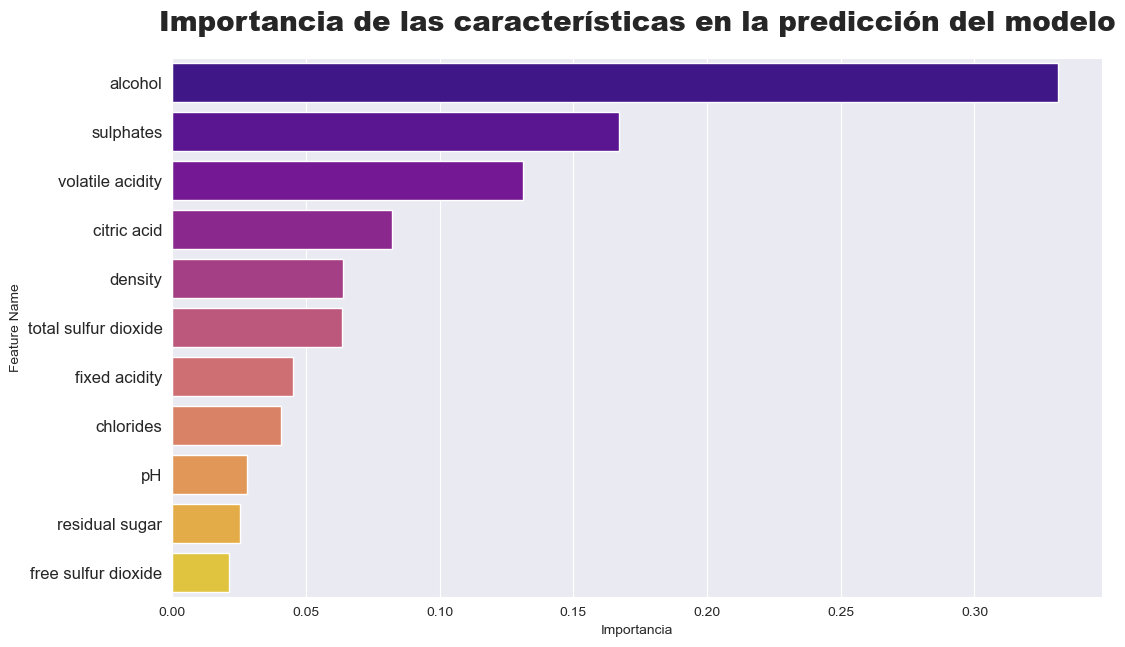

In [95]:
features = imp_df.sort_values(by="Importancia",ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x="Importancia", y="Feature Name", data=features, palette="plasma")
plt.title("Importancia de las características en la predicción del modelo", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()

💬 Inferencia:
* Los factores clave que influyen significativamente en la desactivación de los servicios bancarios de los clientes son:-
Alcohol, Sulfatos, y Acidez Volatilee.
* El impacto mínimo de las características en la desactivación de las instalaciones bancarias de los clientes son:-
Densidad, Dióxido de Azufre Libre, y pH.

# 7- Evaluación del modelo mediante la matriz de confusión

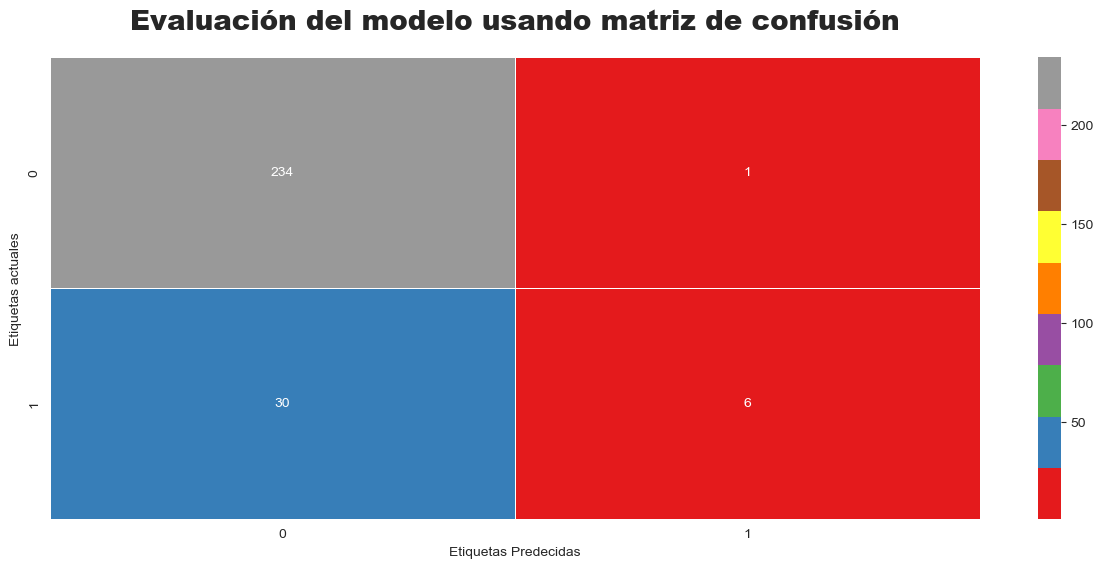

In [98]:
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Evaluación del modelo usando matriz de confusión",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Etiquetas actuales")
plt.xlabel("Etiquetas Predecidas")
plt.show()

💬 Inferencia:
* **Fuerte tasa de verdaderos positivos:** El modelo logró un alto número de predicciones verdaderas positivas, lo que indica su capacidad para identificar correctamente los casos positivos. Esto sugiere que el modelo es eficaz para clasificar con precisión el resultado deseado. 
* **Necesidad de mejora en la tasa de falsos negativos:** La presencia de un número relativamente alto de falsos negativos sugiere que el modelo puede haber pasado por alto la identificación de algunos casos positivos reales. Esto indica la necesidad de un mayor refinamiento para mejorar la capacidad del modelo para capturar todos los casos positivos.

# 8- Evaluación del modelo: Curva ROC y área bajo la curva (AUC)

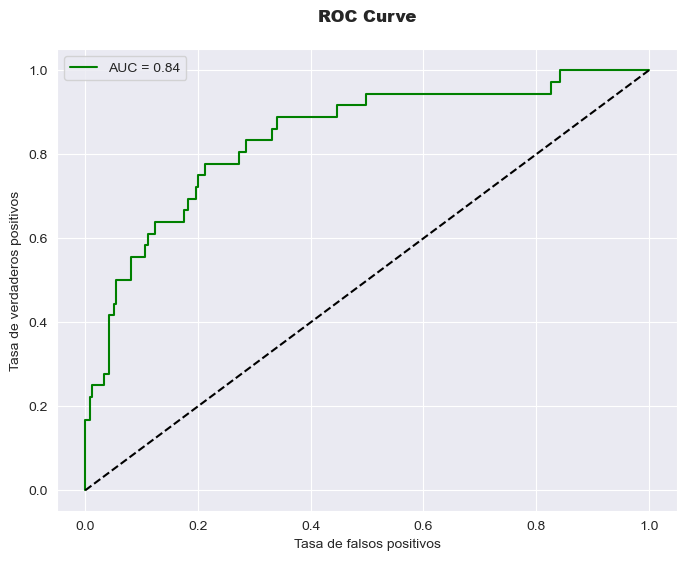

In [101]:
y_pred_proba = rfc.predict_proba(x_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_proba)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("ROC Curve",pad=20,fontweight="black")
plt.legend()
plt.show()

💬 Inferencia:
* Un valor de AUC (Área Bajo la Curva) de 0,84 sugiere que el modelo tiene un fuerte poder discriminativo.
* Esto sugiere que el modelo tiene una alta capacidad para distinguir entre instancias positivas y negativas, lo que indica su eficacia para hacer predicciones precisas.
* El modelo tiene una probabilidad relativamente alta de clasificar mejor un caso positivo seleccionado al azar que un caso negativo seleccionado al azar.

#  CONCLUSIONES 🎈

* Los factores clave que influyen significativamente en la calidad del vino son el Alcohol, los Sulfatos y la Acidez Volátil.
* El impacto mínimo de características en la calidad del vino son Dióxido de Azufre Libre y pH.
* Alta precisión en el entrenamiento y las pruebas: Tanto el modelo como la prueba alcanzaron una alta precisión cercana al 90% en los datos de entrenamiento, lo que indica un buen ajuste a las instancias de entrenamiento. Además, la puntuación de precisión del modelo cercana al 87% en los datos de prueba sugiere su capacidad para generalizar bien a instancias no vistas.
* Alta puntuación F1, recall y precisión: El modelo obtuvo valores altos de puntuación F1, recall y precisión, todos ellos superiores a 0,8. Esto indica que el modelo tiene una gran capacidad de respuesta. Esto indica que el modelo tiene una gran capacidad para identificar correctamente los casos positivos minimizando los falsos positivos y maximizando los verdaderos positivos.
* Un valor de AUC alto, superior a 0,8, indica que el modelo demuestra un poder discriminatorio razonablemente bueno. Sugiere que el modelo es capaz de distinguir entre instancias positivas y negativas con un grado de precisión relativamente alto.
* Rendimiento global del modelo: El modelo demuestra un gran rendimiento en múltiples métricas de evaluación, lo que indica su eficacia a la hora de realizar predicciones precisas y capturar los resultados deseados.

# RECOMENDACIONES 💡

* Factores clave de la calidad: Priorizar Alcohol, Sulfatos y Acidez Volátil ya que influyen significativamente en la calidad del vino.
* Control de calidad: Aplicar medidas estrictas de control de calidad para mantener los niveles deseados de los factores clave durante la producción.
* Enfoque varietal específico: Adaptar el proceso de vinificación a las características únicas y los requisitos de calidad de cada variedad de uva.
* Tecnología y experiencia: Invertir en tecnología moderna de vinificación y emplear enólogos experimentados para garantizar una gestión precisa de los factores de calidad.
* Mejora continua: Supervisar continuamente las opiniones de los clientes y las puntuaciones de los vinos para identificar áreas de mejora y aumentar la calidad general del producto.